<a href="https://colab.research.google.com/github/lsc2159/LinearA_single/blob/main/%EB%B6%93%EA%BD%83_%EA%B3%BC%EC%A0%9C_%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
data_array = np.genfromtxt('iris.csv', delimiter=',', skip_header=1, usecols=(1, 2, 3, 4))
print(data_array)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Iteration 10, Average Cost: 1.202765703201294, Accuracy: 0.008333333767950535
Iteration 20, Average Cost: 0.9369043111801147, Accuracy: 0.4333333373069763
Iteration 30, Average Cost: 0.8059425950050354, Accuracy: 0.6583333611488342
Iteration 40, Average Cost: 0.7325108647346497, Accuracy: 0.6666666865348816
Iteration 50, Average Cost: 0.6826862692832947, Accuracy: 0.6666666865348816
Iteration 60, Average Cost: 0.6454556584358215, Accuracy: 0.675000011920929
Iteration 70, Average Cost: 0.6105464696884155, Accuracy: 0.8333333134651184
Iteration 80, Average Cost: 0.5712054371833801, Accuracy: 0.675000011920929
Iteration 90, Average Cost: 0.5308437943458557, Accuracy: 0.6583333611488342
Iteration 100, Average Cost: 0.49777543544769287, Accuracy: 0.6583333611488342
Iteration 110, Average Cost: 0.472419798374176, Accuracy: 0.6666666865348816
Iteration 120, Average Cost: 0.45230692625045776, Accuracy: 0.7166666388511658
Iteration 130, Average Cost: 0.4352985918521881, Accuracy: 0.741666674613

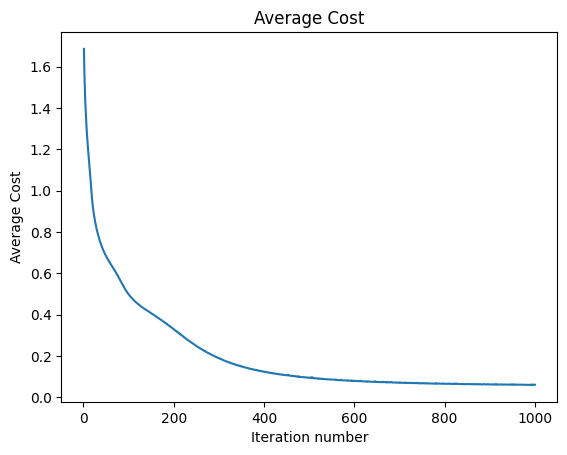

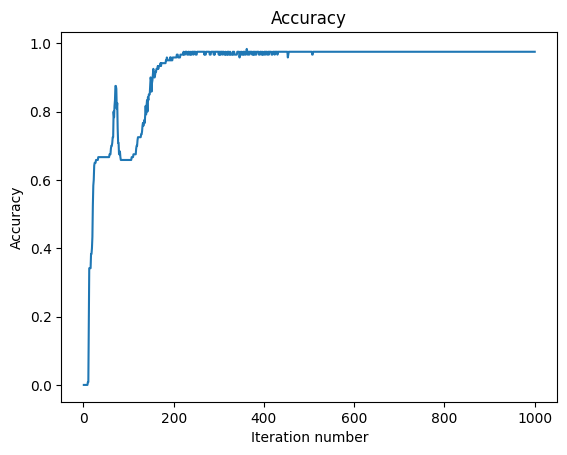

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

iris_df = pd.read_csv('iris.csv')

X = iris_df.iloc[:, 1:5].values
y = iris_df.iloc[:, 5].values

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

costs = []
accuracies = []
iterations = []

batch_size = 10
epochs = 1000
for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

    cost = history.history['loss'][0]
    costs.append(cost)

    accuracy = history.history['accuracy'][0]
    accuracies.append(accuracy)

    iterations.append(epoch + 1)

    if (epoch + 1) % 10 == 0:
        print(f"Iteration {epoch + 1}, Average Cost: {cost}, Accuracy: {accuracy}")

plt.plot(iterations, costs)
plt.title('Average Cost')
plt.xlabel('Iteration number')
plt.ylabel('Average Cost')
plt.show()

plt.plot(iterations, accuracies)
plt.title('Accuracy')
plt.xlabel('Iteration number')
plt.ylabel('Accuracy')
plt.show()